## Decision Tree

In [1]:
install.packages("rpart")
#library need 
library(rpart)
set.seed(123)
setwd("C:/Users/JunHau96/Documents/PM_Assignment")
kd_cleaned = read.csv("cleaned_csv_result-chronic_kidney_disease_full.csv")

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JunHau96\AppData\Local\Temp\RtmpgJUTuC\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
data1 = sort(sample(nrow(kd_cleaned), nrow(kd_cleaned)*.7))
#creating training data set by selecting the output row values
kd_train=kd_cleaned[data1,]

#creating test data set by not selecting the output row values
kd_test=kd_cleaned[-data1,]
tree_train=kd_train
tree_test=kd_test

In [3]:
dt=rpart(X.class.~.,data=tree_train,control=rpart.control(minsplit=2,minbucket=1,cp=0.001))

In [4]:
print(dt)

n= 280 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 280 66.785710 0.607142900  
   2) sc.< 1.25 144 25.972220 0.236111100  
     4) X.sg.>=1.0175 119  8.319328 0.075630250  
       8) X.hemo.>=12.85 112  1.964286 0.017857140  
        16) X.al.< 2 111  0.990991 0.009009009  
          32) X.su.< 1 110  0.000000 0.000000000 *
          33) X.su.>=1 1  0.000000 1.000000000 *
        17) X.al.>=2 1  0.000000 1.000000000 *
       9) X.hemo.< 12.85 7  0.000000 1.000000000 *
     5) X.sg.< 1.0175 25  0.000000 1.000000000 *
   3) sc.>=1.25 136  0.000000 1.000000000 *


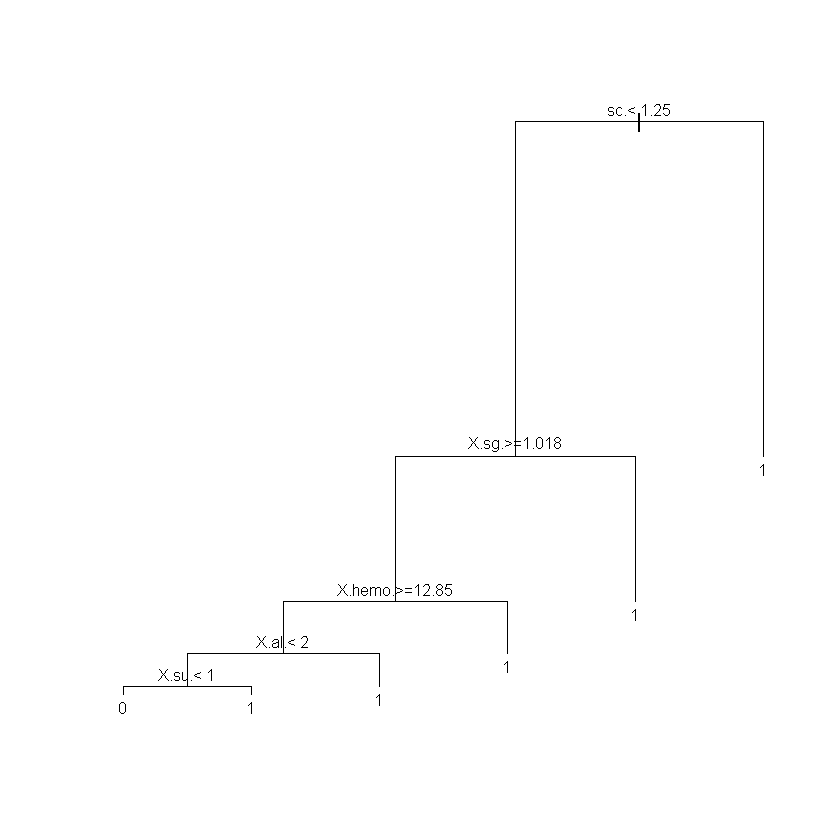

In [5]:
#plot decision tree
plot(dt)
text(dt,cex=0.8)

In [6]:
tree.pred = predict(dt, tree_test)

In [7]:
#Finding the confusion matrix for decision tree
confusion_table=table(tree.pred,tree_test$X.class.)
Accuracy=sum(diag(confusion_table))/sum(confusion_table)
Sensitivity=confusion_table[1,1]/sum(confusion_table[,1])
Specificity=confusion_table[2,2]/sum(confusion_table[,2])
PPV=confusion_table[1,1]/sum(confusion_table[1,])
NPV=confusion_table[2,2]/sum(confusion_table[2,])
FPR=1-Specificity
FNR=1-Sensitivity


In [8]:
cat("Confusion Matrix for Decision Tree\n")
confusion_table
cat("Accuracy:",Accuracy,"\n")
cat("Sensitivity:",Sensitivity,"\n")
cat("Specificity:",Specificity,"\n")
cat("Positive Predictive Value(PPV):",PPV,"\n")
cat("Negative Predictive Value(NPV):",NPV,"\n")
cat("False Positive Rate:",FPR,"\n")
cat("False Negative Rate:",FNR,"\n")

Confusion Matrix for Decision Tree


         
tree.pred  0  1
        0 40  2
        1  0 78

Accuracy: 0.9833333 
Sensitivity: 1 
Specificity: 0.975 
Positive Predictive Value(PPV): 0.952381 
Negative Predictive Value(NPV): 1 
False Positive Rate: 0.025 
False Negative Rate: 0 



Regression tree:
rpart(formula = X.class. ~ ., data = tree_train, control = rpart.control(minsplit = 2, 
    minbucket = 1, cp = 0.001))

Variables actually used in tree construction:
[1] sc.     X.al.   X.hemo. X.sg.   X.su.  

Root node error: 66.786/280 = 0.23852

n= 280 

        CP nsplit rel error   xerror     xstd
1 0.611111      0  1.000000 1.005017 0.026418
2 0.264321      1  0.388889 0.444494 0.049703
3 0.095156      2  0.124567 0.152593 0.042618
4 0.014706      3  0.029412 0.044266 0.025108
5 0.001000      5  0.000000 0.044920 0.025795


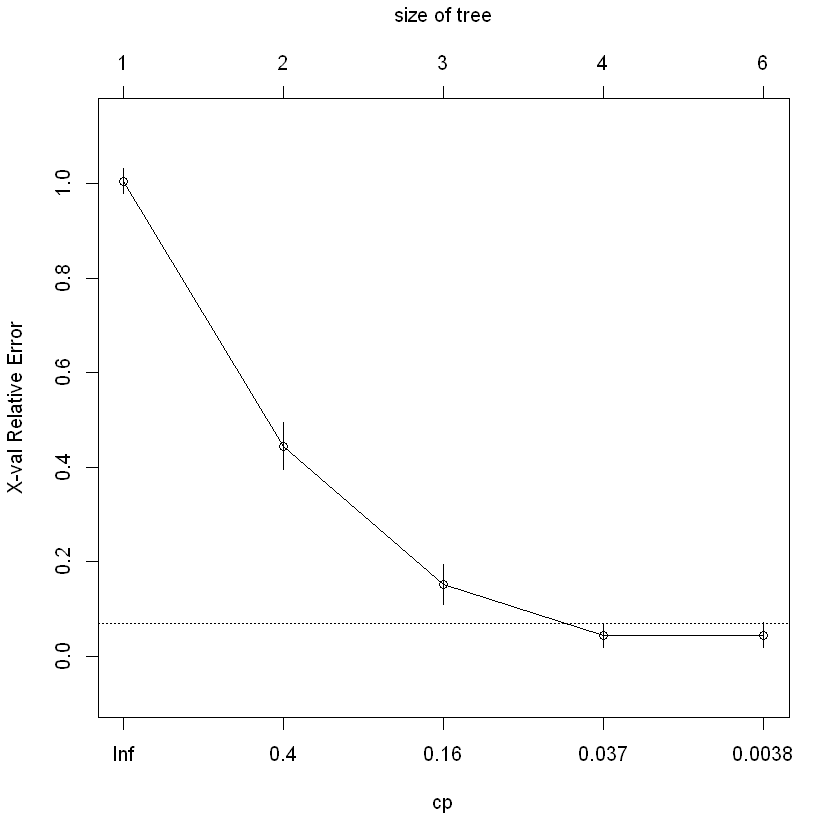

In [9]:
#Determine the optimum value cp for postpruning process
printcp(dt)

plotcp(dt)

## Decision Tree Pruning


Prepruning

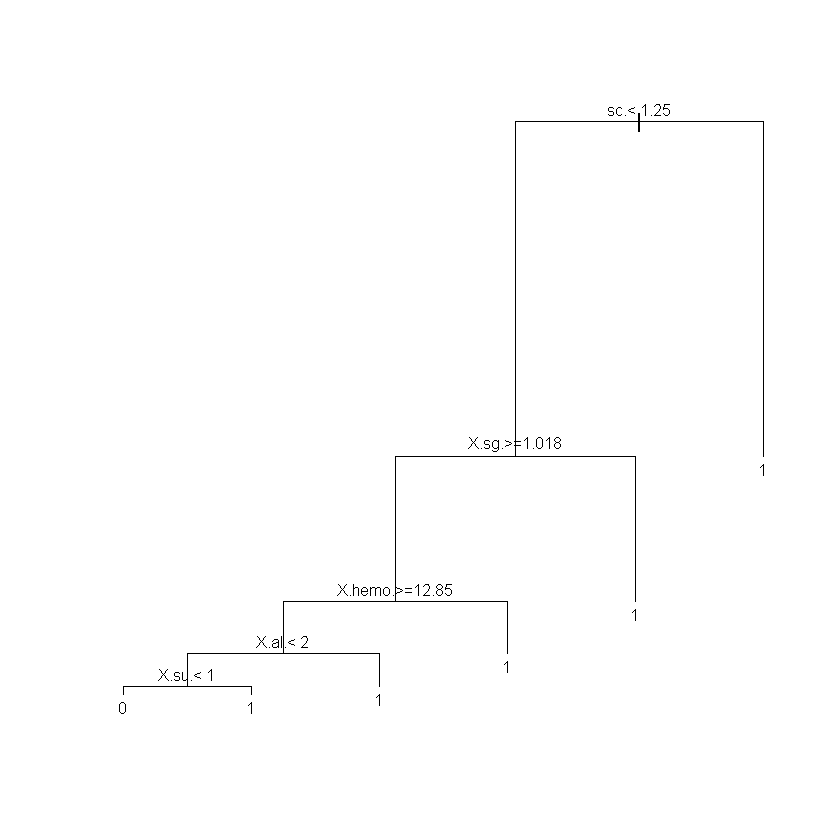

In [10]:
# Grow a tree with minsplit of 4 for prepruning

tree_model_preprun <- rpart(X.class.~., data = tree_train, control = rpart.control(minsplit=4))
#plot decision tree after prepruning
plot(tree_model_preprun)
text(tree_model_preprun,cex=0.8)

In [11]:
preprun.pred<-predict(tree_model_preprun,tree_test)

In [12]:
#Finding the confusion matrix for decision tree after prepruning
preprun.tab=table(preprun.pred,tree_test$X.class.)
Accuracy=sum(diag(preprun.tab))/sum(preprun.tab)
Sensitivity=preprun.tab[1,1]/sum(preprun.tab[,1])
Specificity=preprun.tab[2,2]/sum(preprun.tab[,2])
PPV=preprun.tab[1,1]/sum(preprun.tab[1,])
NPV=preprun.tab[2,2]/sum(preprun.tab[2,])
FPR=1-Specificity
FNR=1-Sensitivity


In [13]:
cat("Confusion Matrix for Decision Tree after prepruning\n")
preprun.tab
cat("Accuracy:",Accuracy,"\n")
cat("Sensitivity:",Sensitivity,"\n")
cat("Specificity:",Specificity,"\n")
cat("Positive Predictive Value(PPV):",PPV,"\n")
cat("Negative Predictive Value(NPV):",NPV,"\n")
cat("False Positive Rate:",FPR,"\n")
cat("False Negative Rate:",FNR,"\n")

Confusion Matrix for Decision Tree after prepruning


            
preprun.pred  0  1
           0 40  2
           1  0 78

Accuracy: 0.9833333 
Sensitivity: 1 
Specificity: 0.975 
Positive Predictive Value(PPV): 0.952381 
Negative Predictive Value(NPV): 1 
False Positive Rate: 0.025 
False Negative Rate: 0 


Postpruning of tree

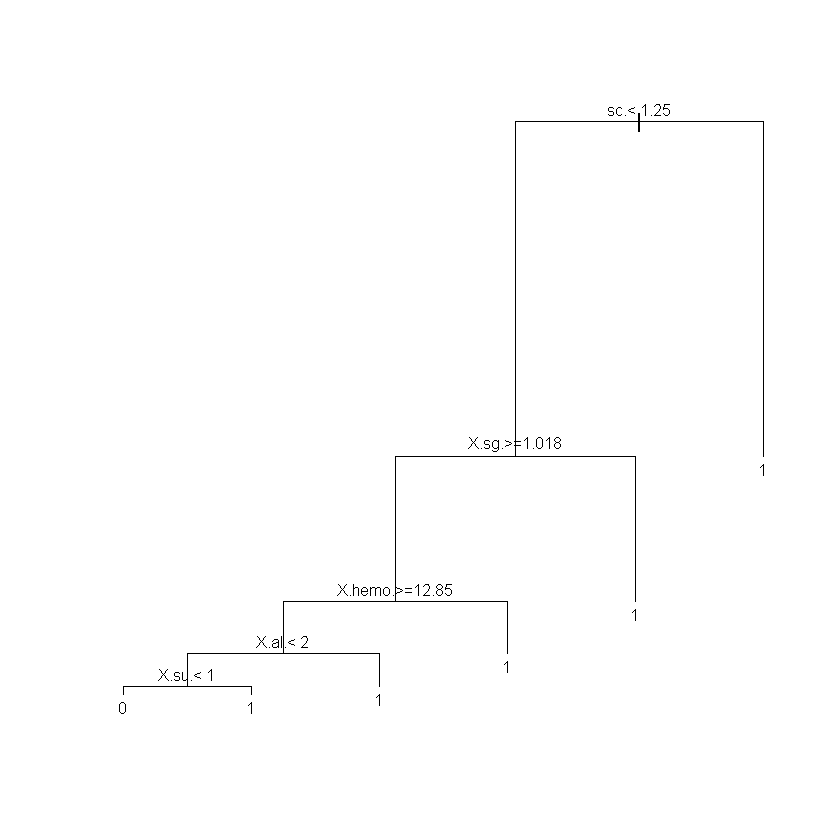

In [14]:
# Prune the tree based on the optimal cp value
tree_post_pruned <- prune(dt, cp = 0.0038 )
#plot decision tree after postpruning
plot(tree_post_pruned)
text(tree_post_pruned,cex=0.8)

postprun.pred <- predict(tree_post_pruned,tree_test)

In [15]:
#Finding the confusion matrix for decision tree after prepruning
postprun.tab=table(postprun.pred,tree_test$X.class.)
Accuracy=sum(diag(postprun.tab))/sum(postprun.tab)
Sensitivity=postprun.tab[1,1]/sum(postprun.tab[,1])
Specificity=postprun.tab[2,2]/sum(postprun.tab[,2])
PPV=postprun.tab[1,1]/sum(postprun.tab[1,])
NPV=postprun.tab[2,2]/sum(postprun.tab[2,])
FPR=1-Specificity
FNR=1-Sensitivity


In [16]:
cat("Confusion Matrix for Decision Tree after postpruning\n")
postprun.tab
cat("Accuracy:",Accuracy,"\n")
cat("Sensitivity:",Sensitivity,"\n")
cat("Specificity:",Specificity,"\n")
cat("Positive Predictive Value(PPV):",PPV,"\n")
cat("Negative Predictive Value(NPV):",NPV,"\n")
cat("False Positive Rate:",FPR,"\n")
cat("False Negative Rate:",FNR,"\n")

Confusion Matrix for Decision Tree after postpruning


             
postprun.pred  0  1
            0 40  2
            1  0 78

Accuracy: 0.9833333 
Sensitivity: 1 
Specificity: 0.975 
Positive Predictive Value(PPV): 0.952381 
Negative Predictive Value(NPV): 1 
False Positive Rate: 0.025 
False Negative Rate: 0 
